In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm as tqdm_notebook

In [2]:
NUM_TRIALS  = 10000
EPS = 0.1
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]

optimal j: 2


  0%|          | 0/10000 [00:00<?, ?it/s]

mean estimate: 0.7272727272727273
mean estimate: 0.7222222222222222
mean estimate: 0.7430695058256296
total reward earned: 7417.0
overall win rate: 0.7417
num times selected each bandit: [11.0, 36.0, 9956.0]


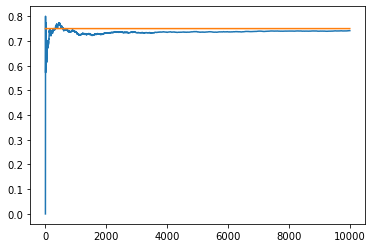

In [3]:
class Bandit:
    def __init__(self, p):
        # p: the win rate
        self.p = p
        self.p_estimate = 5.
        self.N = 1. # number of samples collected so far
    
    def pull(self):
        # draw a 1 with prop p
        return np.random.random() < self.p
    
    def update(self, x):
        self.N += 1.
        self.p_estimate = ((self.N -1)* self.p_estimate + x) / self.N
        
def experiment():
    bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]
    
    rewards = np.zeros(NUM_TRIALS)
    num_times_explored = 0
    num_times_exploited = 0
    num_optimal = 0
    optimal_j = np.argmax([b.p for b in bandits])
    print("optimal j:", optimal_j)
    
    for i in tqdm_notebook(range(NUM_TRIALS)):
        
        # use optimistic-greedy to select the next bandit

        j = np.argmax([b.p_estimate for b in bandits])
            
        # pull the arm for the bandit with the largest sample
        x = bandits[j].pull()
        
        # update the rewards log
        rewards[i] = x
        
        # update then distribution for the bandit arm we just pulled
        bandits[j].update(x)
        
        
        # print mean estimates for each bandit
        
    for b in bandits:
            print("mean estimate:", b.p_estimate)
            
        # print total rewaed
    print("total reward earned:", rewards.sum())
    print("overall win rate:", rewards.sum() / NUM_TRIALS)
    # print("num_times_explored:", num_times_explored)
    # print("num_times_exploited", num_times_exploited)
    print("num times selected each bandit:", [b.N for b in bandits])
    # print("num times selectec optimal bandit:", num_optimal)

    # plot the results

    cumulative_rewards = np.cumsum(rewards)
    win_rates = cumulative_rewards / (np.arange(NUM_TRIALS) + 1)
    plt.plot(win_rates)
    plt.plot(np.ones(NUM_TRIALS) * np.max(BANDIT_PROBABILITIES))

if __name__ == "__main__":
    experiment()